CSC 215 - Final Project

Email Spam or Ham

Team Members:

Harneet Kaur - 302826303

Mahima Appana – 301624141 

**DATA PREPROCESSING**

Importing necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import re
import nltk
from keras.preprocessing.text import Tokenizer

unzip the source data

In [2]:
!unzip '/content/archive.zip' -d '/content/data'

Archive:  /content/archive.zip
  inflating: /content/data/spam_ham.csv  


Pull the source data

In [3]:
dframe=pd.read_csv('/content/data/spam_ham.csv' , sep=',')
dframe[46:]

,text,sp_ha
46,From fork-admin@xent.com Wed Oct 9 10:55:12 20...,0
47,From razor-users-admin@lists.sourceforge.net F...,0
48,From fork-admin@xent.com Tue Jul 23 14:27:17 2...,0
49,From leadsales400042@yahoo.com Mon Jun 24 17:0...,1
50,From rssfeeds@jmason.org Thu Sep 26 16:34:06 2...,0
...,...,...
5823,From ilug-admin@linux.ie Mon Jul 22 18:12:45 2...,0
5824,From fork-admin@xent.com Mon Oct 7 20:37:02 20...,0
5825,Received: from hq.pro-ns.net (localhost [127.0...,1
5826,From razor-users-admin@lists.sourceforge.net T...,0


checking the dframe

In [4]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5828 entries, 0 to 5827
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5826 non-null   object
 1   sp_ha   5825 non-null   object
dtypes: object(2)
memory usage: 91.2+ KB


below is the example for genuine email

In [5]:
dummy=dframe['text'][49]
dummy

'From leadsales400042@yahoo.com Mon Jun 24 17:03:55 2002 Return-Path: leadsales400042@yahoo.com Delivery-Date: Wed May 15 16:24:17 2002 Received: from MIRAFLORES.GOB.PE ([161.132.70.10]) by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g4FFOAe12470 for <webmaster@efi.ie>; Wed, 15 May 2002 16:24:10 +0100 Message-Id: <200205151524.g4FFOAe12470@dogma.slashnull.org> Received: from yahoo.com([208.166.82.124]) by MIRAFLORES.GOB.PE (IBM OS/400 SMTP V05R01M00) with TCP; Wed, 15 May 2002 10:23:51 +0000 From: leadsales400042@yahoo.com To: webmaster@efi.ie Subject: Got Leads? Date: 15 May 2002 20:34:36 -0700 MIME-Version: 1.0 X-Keywords: Content-Type: text/html Content-Transfer-Encoding: quoted-printable <html> HEY, I AM FORWARDING YOU THE AD THEY SENT ME. I TRIED THE LEADS AND THINK WE SHOULD USE THEM FOR OUR TEAM. WHAT DO YOU THINK? THANKS, JOHN <head> <meta http-equiv=3D"Content-Type" content=3D"text/html; charset=3Dwindows= -1252"> <meta name=3D"GENERATOR" content=3D"Microsoft FrontPage 4

Example for spam email

In [6]:

ones=dframe['text'].where(dframe['sp_ha']=='1')
strngg=ones[1]

Preprocessing 

```
# Dropping data with nan values
```

---



---



In [7]:
dframe[dframe['sp_ha'].isna()]

,text,sp_ha
3872,From regal3@freeuk.com Fri Jul 26 03:51:44 200...,NaN
3873,NaN,NaN
3874,NaN,NaN


In [8]:
dframe=dframe.dropna()

In [9]:
dframe['sp_ha'].value_counts()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            3911
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

Removing values other than 0 or 1

In [10]:
dframe1=dframe[(dframe.sp_ha.isin(['0','1']))]
dframe1.sp_ha.value_counts()

0    3911
1    1912
Name: sp_ha, dtype: int64

Drop duplicate

In [11]:
dframe1.drop_duplicates(inplace=True)

<ipython-input-11-a39617d064bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dframe1.drop_duplicates(inplace=True)


Refining text

In [12]:
from bs4 import BeautifulSoup
def format(string):
  soup = BeautifulSoup(string, features="html.parser")
# kill all script and style elements
  for script in soup(["script", "style"]):
    script.extract()
  text=soup.get_text() 
  my_new_string_1=re.sub(r'^.*?Subject', '', text)
  my_new_string_2=re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*', "", my_new_string_1)
  my_new_string_3 = re.sub('[^a-zA-Z0-9 \n\.]', '', my_new_string_2)
  my_new_string_4=''.join(my_new_string_3.split('.'))
  my_new_string_5=" ".join(my_new_string_4.split())
  my_new_string_6=re.sub(r'[A-Za-z0-9]*@[A-Za-z]*\.?[A-Za-z0-9]*', "", my_new_string_5)
  my_new_string_7 = re.sub('http[^\s]+','',my_new_string_6)
  # my_new_string_5 = my_new_string_4.rsplit('printable', 1)[1]
  output_string=my_new_string_7.lower()
  return output_string

In [13]:
r = format(dummy)
r

'got leads date 15 may 2002 203436 0700 mimeversion 10 xkeywords contenttype texthtml contenttransferencoding quotedprintable hey i am forwarding you the ad they sent me i tried the leads and think we should use them for our team what do you think thanks john lead sale extended you have been invited to join the coop lead sale extended we have recently put together a lead coop specifically for your group we have been able to lock the price at as little as 50 cents per lead leads are normally 13 per so sign up today get o ur leads and g et to work here is what we hav e to offer you network marketer or gifter contacts all leads guaranteed to be network marketers o r gifters guaranteed to be current active and experienced leads have either responded to a internet quest ionnaire or are already on our contact list of current active networkers open to opportunity leads includeat least name phone and email use us as a tool to build your businessnbs p refer as many people as you can earn a true

In [14]:
df2 = dframe1['text'].apply(format)
# dummy=dframe['text'][52]
# dummy

In [15]:
df2[901]

'world wide words 20 jul 02 to org world wide words issue 296 saturday 20 july 2002 sent each saturday to 15000 subscribers in at least 119 countries editor michael quinion thornbury bristol uk issn 14701448 if you respond to this mailing remember to change the outgoing address to one of those in the contact addresses section contents 1 turns of phrase beanpole family 2 weird words jobbernowl 3 beyond words 4 qa chip off the old block bells and whistles mortarboard 5 endnote 6 subscription commands 7 contact addresses 1 turns of phrase beanpole family historically families have usually had more children than parents resulting in family trees that looked like pyramids however in recent years especially in countries like britain and the us the number of children per generation has steadily gone down while life span has increased this has led to a shape of family tree that some researchers have likened to a beanpole tall and thin with few people in each generation the term beanpole family

Removing Stopwords

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
", ".join(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

In [18]:
df2

0       re ilug architecture crossover trouble w rh72 ...
1       cash in on your home equity date tue 04 jun 20...
2       are your mortgage rates the best they can be 0...
3       online approval for 5000 now mimeversion 10 xk...
4       re ilug expanding a string multiple times mess...
                              ...                        
5823    re ilug nmap results date mon 22 jul 2002 1518...
5824    re the absurdities of life inreplyto 328339468...
5825    real drugsviagra and phentrimine date sun 21 j...
5826    razorusers no positive razor hits sender razor...
5827    are you being freeserved date mon 30 sep 2002 ...
Name: text, Length: 5320, dtype: object

In [19]:
df2 = df2.apply(lambda x: remove_stopwords(x))

In [20]:
df2[901]

'world wide words 20 jul 02 org world wide words issue 296 saturday 20 july 2002 sent saturday 15000 subscribers least 119 countries editor michael quinion thornbury bristol uk issn 14701448 respond mailing remember change outgoing address one contact addresses section contents 1 turns phrase beanpole family 2 weird words jobbernowl 3 beyond words 4 qa chip old block bells whistles mortarboard 5 endnote 6 subscription commands 7 contact addresses 1 turns phrase beanpole family historically families usually children parents resulting family trees looked like pyramids however recent years especially countries like britain us number children per generation steadily gone life span increased led shape family tree researchers likened beanpole tall thin people generation term beanpole family around academic literature least since 1987 rarely appears elsewhere recent british report brought wider public notice least uk researchers find slangy prefer jargon term verticalised describe families wh

In [21]:
data = pd.concat([df2, dframe1['sp_ha']], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 5827
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5320 non-null   object
 1   sp_ha   5320 non-null   object
dtypes: object(2)
memory usage: 253.7+ KB


In [22]:

data['sp_ha'] = data['sp_ha'].astype(str).astype(int)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 5827
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5320 non-null   object
 1   sp_ha   5320 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 253.7+ KB


Train test split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sp_ha'], train_size=0.7, shuffle=True, random_state=1)

shape

In [25]:
X_train.shape

(3723,)

In [26]:
y_train.shape

(3723,)

In [27]:
X_test.shape

(1597,)

In [28]:
y_test.shape

(1597,)

In [29]:
y_train.value_counts()

0    2537
1    1186
Name: sp_ha, dtype: int64

In [30]:
y_test.value_counts()

0    1097
1     500
Name: sp_ha, dtype: int64

Tokenization and converting to sequences

In [31]:
# tokenize text
tokenizer = Tokenizer(num_words=30000)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

55837

Convert whole text into uniform list of features

In [32]:
sequences = tokenizer.texts_to_sequences(X_train)

In [33]:
!pip install pad_sequences
import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10212 sha256=4f1e3f8286edafff4672adb1bc8089cba14cde1251c7b9b48101d6787dfed7d8
  Stored in directory: /root/.cache/pip/wheels/48/9d/22/0a6305b87a9cc46ccc032060a041c3b59f39ac462f7358997e
Successfully built pad_sequences


In [34]:
len_of_seq=max(len(data) for data in X_train)
len_of_seq

23852

In [35]:
padded_seq = pad_sequences(sequences, maxlen = 23852,padding='post',truncating='post')

In [36]:
padded_seq[0]

array([373, 244,  45, ...,   0,   0,   0], dtype=int32)

In [37]:
padded_seq.shape

(3723, 23852)

In [38]:
# creating embedded dictionary to store embeddings
embedding_index = {}
with open('/content/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [39]:
embedding_index['click']

array([-0.76673  , -0.35962  ,  0.38721  , -0.1958   ,  0.61328  ,
        0.39608  , -0.39255  ,  0.084647 ,  1.1457   , -0.92574  ,
        0.20821  ,  0.027812 , -0.24241  , -0.4521   ,  0.38422  ,
        0.57788  , -0.14454  ,  0.13371  , -0.28994  ,  0.2971   ,
       -0.15786  , -0.064929 , -0.13543  , -0.33439  ,  0.37856  ,
       -0.10398  ,  0.095334 ,  0.17249  , -0.136    , -1.61     ,
        0.48465  ,  1.0644   , -0.030418 ,  0.464    ,  0.78451  ,
       -0.048658 , -1.1462   , -0.48513  ,  0.81454  , -0.65588  ,
        0.46249  , -0.0093431, -0.86981  , -0.64112  , -1.175    ,
        0.78349  , -0.32483  , -0.21142  ,  0.028849 , -0.52715  ,
        0.24266  ,  0.27229  , -0.29672  , -0.18241  , -0.65326  ,
       -0.80052  , -0.40157  ,  0.52767  ,  1.6509   , -0.26219  ,
       -0.43427  ,  0.94912  ,  0.25235  , -0.30629  ,  0.73016  ,
        0.84537  ,  0.38716  ,  0.14442  , -0.21069  , -0.027754 ,
       -0.29799  ,  0.38283  , -0.15234  , -0.98401  , -0.1693

In [40]:
# create embedding matrix
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [41]:
embedding_matrix.shape

(55838, 100)

In [42]:
embedding_matrix[1]

array([ 3.53419989e-01, -1.56670004e-01,  2.86049992e-01, -3.90439987e-01,
        7.38390028e-01, -2.30250001e-01,  5.69360018e-01,  4.16850001e-01,
       -2.61959992e-02,  3.06650013e-01,  6.08529985e-01, -2.92290002e-01,
        3.53859991e-01,  1.68850005e-01, -2.83569992e-01,  1.03069998e-01,
        3.03849995e-01,  7.07959980e-02, -5.12939990e-01,  2.26490006e-01,
        1.65810004e-01, -3.66360009e-01,  6.84610009e-01,  9.96249974e-01,
       -1.93799997e-03, -2.62529999e-01,  3.27809989e-01, -5.34250021e-01,
        4.15250003e-01, -2.36739993e-01,  1.29640000e-02,  3.96869987e-01,
       -1.13660000e-01, -2.79350013e-01, -1.37009993e-01,  2.51589995e-02,
       -2.22779997e-02,  4.16779995e-01, -6.83309972e-01, -1.01000004e-01,
       -1.39990002e-01, -3.11360002e-01,  4.19539988e-01,  2.62030005e-01,
        4.23599988e-01,  2.34970003e-02,  3.32569987e-01, -1.05060005e+00,
       -1.78120002e-01, -6.28920019e-01, -4.27810013e-01, -3.04580003e-01,
        3.66869986e-01,  

In [43]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(padded_seq, y_train, test_size=0.1, random_state=37)

In [44]:
y_valid_emb.value_counts()

0    255
1    118
Name: sp_ha, dtype: int64

In [45]:
y_train_emb.value_counts()

0    2282
1    1068
Name: sp_ha, dtype: int64

**FCNN**

In [46]:
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from keras.layers import  Dropout

In [47]:
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

#X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(padded_seq, y_train, test_size=0.1, random_state=37)
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_emb.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=0, mode='auto')
checkpointer = ModelCheckpoint(filepath="data/best_weights.hdf5", verbose=0, save_best_only=True) # save best model

model.fit(X_train_emb, y_train_emb, epochs=150, batch_size=32, validation_data=(X_valid_emb, y_valid_emb),callbacks=[monitor,checkpointer])
model.load_weights('data/best_weights.hdf5')

Epoch 1/150
105/105 [==============================] - 6s 9ms/step - loss: 45.5973 - accuracy: 0.6197 - val_loss: 22.0097 - val_accuracy: 0.6488
Epoch 2/150
105/105 [==============================] - 1s 6ms/step - loss: 13.0401 - accuracy: 0.6818 - val_loss: 12.6647 - val_accuracy: 0.6408
Epoch 3/150
105/105 [==============================] - 1s 5ms/step - loss: 9.7679 - accuracy: 0.7343 - val_loss: 12.6795 - val_accuracy: 0.6434
Epoch 4/150
105/105 [==============================] - 1s 6ms/step - loss: 3.0181 - accuracy: 0.7600 - val_loss: 9.0650 - val_accuracy: 0.5603
Epoch 5/150
105/105 [==============================] - 1s 6ms/step - loss: 4.7918 - accuracy: 0.7412 - val_loss: 18.4321 - val_accuracy: 0.6702
Epoch 6/150
105/105 [==============================] - 1s 5ms/step - loss: 3.0904 - accuracy: 0.7430 - val_loss: 13.8151 - val_accuracy: 0.6113
Epoch 7/150
105/105 [==============================] - 1s 6ms/step - loss: 3.1718 - accuracy: 0.7522 - val_loss: 13.9110 - val_accuracy

In [48]:
y_pred_ann = model.predict(X_valid_emb)
print(y_pred_ann[0:5])

12/12 [==============================] - 0s 7ms/step
[[8.5701108e-12]
 [1.0620934e-11]
 [9.9959058e-01]
 [9.9758887e-01]
 [4.5388344e-08]]


In [49]:


sequences_test = tokenizer.texts_to_sequences(X_test)
padded_seq_test = pad_sequences(sequences_test, maxlen = 23852,padding='post',truncating='post')

In [50]:
predict=model.predict(padded_seq_test)

50/50 [==============================] - 0s 4ms/step


In [51]:
type(predict)

numpy.ndarray

In [52]:
y_true=[]
for p in predict:
  if p > 0.5:
    p = 1
    y_true.append(p)
  else:
    p = 0
    y_true.append(p)

In [53]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_true))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      1097
           1       0.45      0.48      0.47       500

    accuracy                           0.65      1597
   macro avg       0.60      0.61      0.61      1597
weighted avg       0.66      0.65      0.66      1597



In [54]:
cm=metrics.confusion_matrix(y_test,y_true)

cm

array([[804, 293],
       [258, 242]])

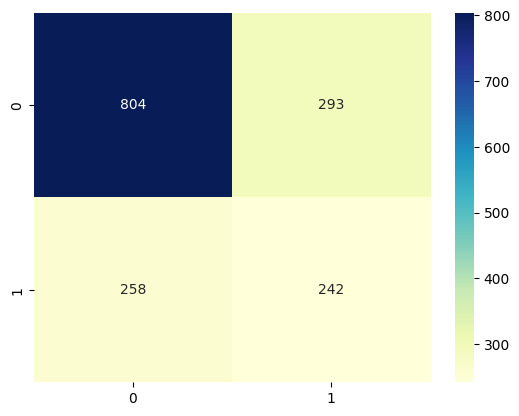

In [55]:
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm)
s=sns.heatmap(cm_matrix, annot=True, fmt='g', cmap='YlGnBu')


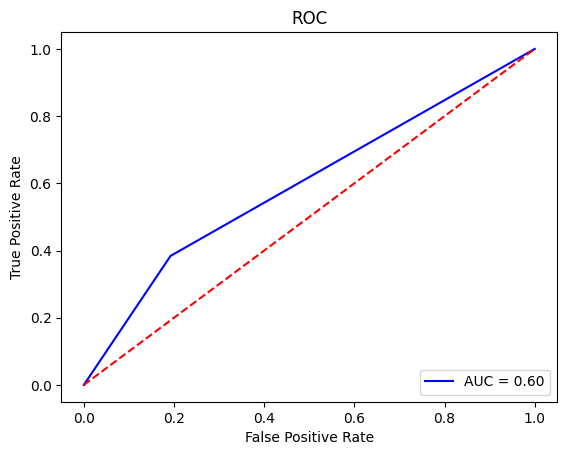

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr , tpr , thresh = roc_curve(y_test,y_true)
roc_auc = roc_auc_score(y_test,y_true)
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1526592   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,528,705
Trainable params: 1,528,705
Non-trainable params: 0
_________________________________________________________________


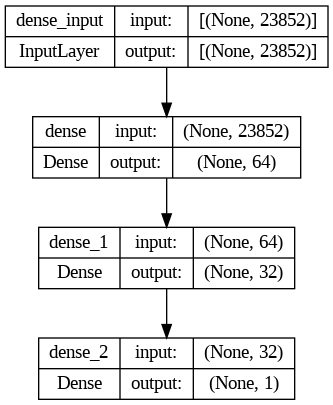

In [ ]:

from tensorflow.keras.utils import plot_model
# plot graph
plot_model(model, show_shapes=True)

**RNN(LSTM)**

In [56]:
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from keras.layers import  Dropout

In [57]:
LSTM_model = Sequential([
    Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [58]:
from keras.optimizers import SGD

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

opt = SGD(lr=0.01)
LSTM_model.compile(loss='binary_crossentropy', optimizer=opt, metrics='accuracy')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=0, mode='auto')
checkpointer = ModelCheckpoint(filepath="data/best_weights_LSTM.hdf5", verbose=0, save_best_only=True) # save best model


LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         5583800   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,676,601
Trainable params: 92,801
Non-trainable params: 5,583,800
_______________________________________

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = LSTM_model.fit(
    X_train_emb,
    y_train_emb,
    validation_split=0.2,
    batch_size=50,
    validation_data=(X_valid_emb, y_valid_emb),
    epochs=20
    ,callbacks=[monitor,checkpointer]
)
LSTM_model.load_weights('data/best_weights_LSTM.hdf5')

Epoch 1/20
67/67 [==============================] - 83s 1s/step - loss: 0.4985 - accuracy: 0.7821 - val_loss: 0.4906 - val_accuracy: 0.8070
Epoch 2/20
67/67 [==============================] - 82s 1s/step - loss: 0.4708 - accuracy: 0.8113 - val_loss: 0.4669 - val_accuracy: 0.8204
Epoch 3/20
67/67 [==============================] - 83s 1s/step - loss: 0.4461 - accuracy: 0.8206 - val_loss: 0.4423 - val_accuracy: 0.8391
Epoch 4/20
67/67 [==============================] - 81s 1s/step - loss: 0.4136 - accuracy: 0.8412 - val_loss: 0.4107 - val_accuracy: 0.8552
Epoch 5/20
67/67 [==============================] - 81s 1s/step - loss: 0.3764 - accuracy: 0.8600 - val_loss: 0.3713 - val_accuracy: 0.8767
Epoch 6/20
67/67 [==============================] - 83s 1s/step - loss: 0.3334 - accuracy: 0.8779 - val_loss: 0.3280 - val_accuracy: 0.8847
Epoch 7/20
67/67 [==============================] - 82s 1s/step - loss: 0.2974 - accuracy: 0.8910 - val_loss: 0.3061 - val_accuracy: 0.8794
Epoch 8/20
67/67 [==

In [ ]:
LSTM_predict=LSTM_model.predict(padded_seq_test)

50/50 [==============================] - 24s 475ms/step


In [ ]:
y_true_LSTM=[]
for p in LSTM_predict:
  if p > 0.5:
    p = 1
    y_true_LSTM.append(p)
  else:
    p = 0
    y_true_LSTM.append(p)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_true_LSTM))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1097
           1       0.91      0.74      0.82       500

    accuracy                           0.90      1597
   macro avg       0.90      0.85      0.87      1597
weighted avg       0.90      0.90      0.89      1597



In [ ]:
LSTM_cm=metrics.confusion_matrix(y_test,y_true_LSTM)

LSTM_cm

array([[1059,   38],
       [ 129,  371]])

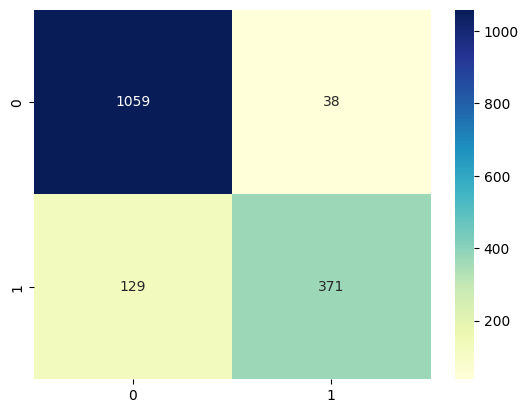

In [ ]:
import seaborn as sns

cm_matrix = pd.DataFrame(data=LSTM_cm)
s=sns.heatmap(cm_matrix, annot=True, fmt='g', cmap='YlGnBu')


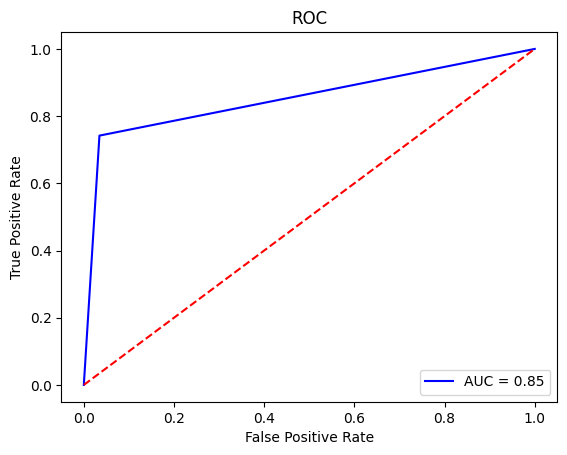

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr , tpr , thresh = roc_curve(y_test,y_true_LSTM)
roc_auc = roc_auc_score(y_test,y_true_LSTM)
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

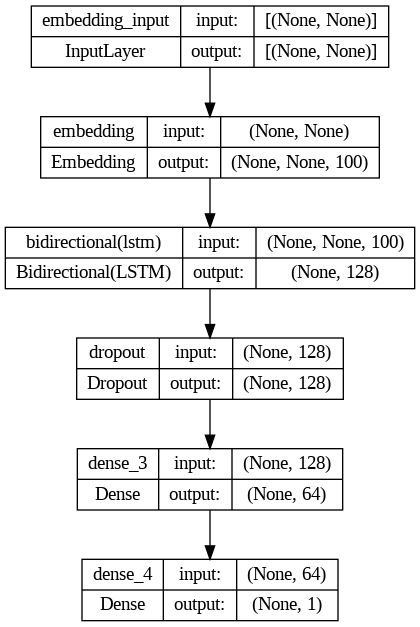

In [ ]:

from tensorflow.keras.utils import plot_model
# plot graph
plot_model(LSTM_model, show_shapes=True)